In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/train (2).csv")
print(df.head())

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0


In [ ]:
df.shape

(3662, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    3662 non-null   object
 1   diagnosis  3662 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


In [ ]:
df.describe()

,diagnosis
count,3662.000000
mean,1.126980
std,1.298409
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,4.000000


In [ ]:
df.columns.tolist()

['id_code', 'diagnosis']

In [ ]:
df.isnull().sum()

,0
id_code,0
diagnosis,0


In [ ]:
df.nunique()

,0
id_code,3662
diagnosis,5


In [ ]:
import os
from pathlib import Path # Import the Path object from pathlib

image_dir = Path('/content/drive/MyDrive/dataset')

filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [ ]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

image_df = image_df.sample(frac=1).reset_index(drop = True)

image_df.head()

,Filepath,Label
0,/content/drive/MyDrive/dataset/Mild/44855f6662...,Mild
1,/content/drive/MyDrive/dataset/No_DR/b0619ca93...,No_DR
2,/content/drive/MyDrive/dataset/6f0463c1ff18.png,dataset
3,/content/drive/MyDrive/dataset/co/7f60f2a083d3...,co
4,/content/drive/MyDrive/dataset/Moderate/1c6d11...,Moderate


In [ ]:
image_df.count()

,0
Filepath,6728
Label,6728


In [ ]:
filepaths

,Filepath
0,/content/drive/MyDrive/dataset/441117562359.png
1,/content/drive/MyDrive/dataset/441affbe99aa.png
2,/content/drive/MyDrive/dataset/4478b870e549.png
3,/content/drive/MyDrive/dataset/44c869174e3a.png
4,/content/drive/MyDrive/dataset/437900a99871.png
...,...
6723,/content/drive/MyDrive/dataset/co/7d1b40fdbd86...
6724,/content/drive/MyDrive/dataset/co/7d261f986bef...
6725,/content/drive/MyDrive/dataset/co/7d37a2939f12...
6726,/content/drive/MyDrive/dataset/co/7d8f67cadc29...


In [ ]:
level = []
for i in image_df['Label']:
    if i=='No_DR':
        level.append(0)
    elif i=='Mild':
        level.append(1)
    elif i=='Moderate':
        level.append(2)
    elif i=='Severe':
        level.append(3)
    else:
        level.append(4)
image_df['Level'] = level

In [ ]:
image_df.head()

,Filepath,Label,Level
0,/content/drive/MyDrive/dataset/Mild/44855f6662...,Mild,1
1,/content/drive/MyDrive/dataset/No_DR/b0619ca93...,No_DR,0
2,/content/drive/MyDrive/dataset/6f0463c1ff18.png,dataset,4
3,/content/drive/MyDrive/dataset/co/7f60f2a083d3...,co,4
4,/content/drive/MyDrive/dataset/Moderate/1c6d11...,Moderate,2


In [ ]:
image_df.count()

,0
Filepath,6728
Label,6728
Level,6728


In [ ]:
level

[1,
 0,
 4,
 4,
 2,
 0,
 0,
 4,
 1,
 2,
 4,
 4,
 4,
 2,
 0,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 4,
 2,
 0,
 1,
 4,
 4,
 0,
 4,
 0,
 1,
 4,
 3,
 2,
 2,
 4,
 0,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 1,
 4,
 4,
 0,
 0,
 0,
 4,
 2,
 1,
 2,
 0,
 0,
 4,
 3,
 0,
 4,
 1,
 0,
 0,
 0,
 4,
 4,
 2,
 2,
 3,
 4,
 4,
 4,
 0,
 1,
 0,
 4,
 4,
 4,
 1,
 0,
 0,
 0,
 4,
 4,
 0,
 2,
 1,
 4,
 0,
 4,
 1,
 2,
 2,
 0,
 4,
 0,
 0,
 1,
 4,
 4,
 4,
 0,
 4,
 4,
 1,
 4,
 1,
 4,
 2,
 4,
 2,
 4,
 0,
 4,
 4,
 2,
 0,
 0,
 4,
 4,
 4,
 4,
 0,
 0,
 4,
 1,
 4,
 4,
 4,
 1,
 4,
 1,
 0,
 4,
 4,
 3,
 2,
 4,
 4,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 4,
 1,
 3,
 1,
 4,
 0,
 4,
 1,
 4,
 4,
 2,
 0,
 4,
 2,
 4,
 4,
 0,
 1,
 4,
 4,
 4,
 0,
 2,
 0,
 4,
 0,
 2,
 4,
 0,
 0,
 4,
 4,
 2,
 4,
 1,
 2,
 1,
 1,
 0,
 4,
 4,
 4,
 4,
 1,
 0,
 0,
 1,
 4,
 2,
 3,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 1,
 0,
 4,
 1,
 4,
 4,
 0,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 3,
 0,
 0,
 4,
 0,
 0,
 2,
 0,
 2,
 4,
 2,
 4,
 1,
 4,
 2,
 0,
 4,
 4,
 4,
 4,
 0,
 0,
 4,
 0,
 4,
 4,
 1,
 0,
 0,


In [ ]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6728 entries, 0 to 6727
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filepath  6728 non-null   object
 1   Label     6728 non-null   object
 2   Level     6728 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


In [ ]:
image_df.describe()

,Level
count,6728.000000
mean,2.267687
std,1.707411
min,0.000000
25%,0.000000
50%,2.000000
75%,4.000000
max,4.000000


In [ ]:
print(image_df.dtypes)

Filepath    object
Label       object
Level        int64
dtype: object


In [ ]:
image_df1 = image_df.copy()

In [ ]:
image_df_encoded = pd.get_dummies(image_df1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in image_df1.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    image_df1[column] = le.fit_transform(image_df1[column])
    label_encoders[column] = le

In [ ]:
print(image_df1.corr())

          Filepath     Label     Level
Filepath  1.000000  0.439727  0.351347
Label     0.439727  1.000000  0.789241
Level     0.351347  0.789241  1.000000


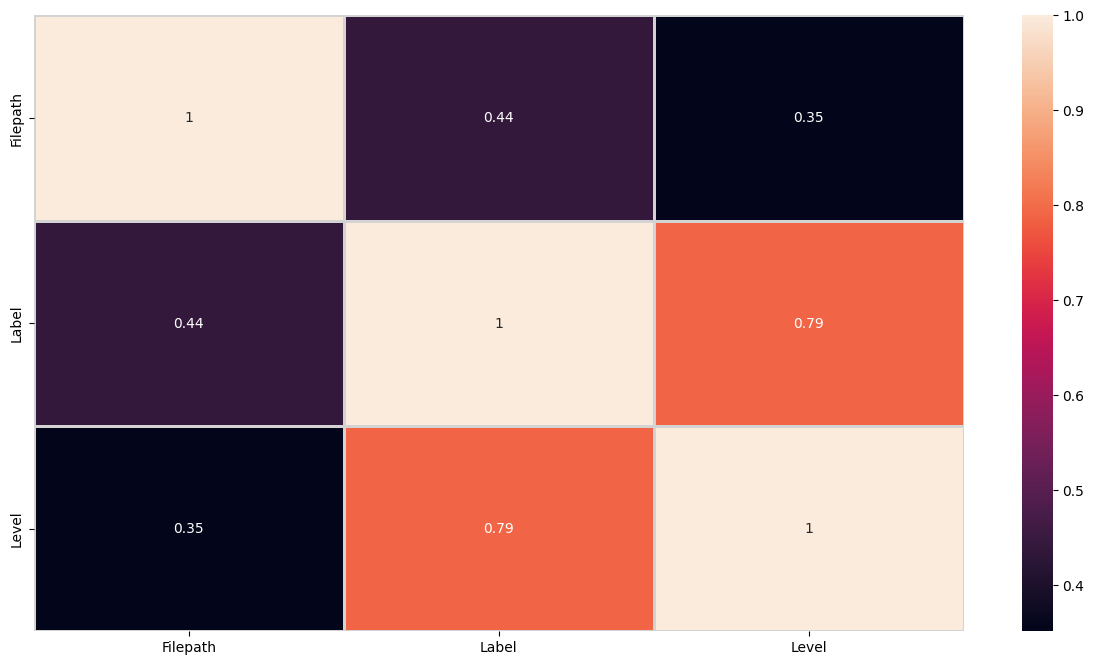

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(image_df1.corr(), annot=True, linewidth=2, linecolor = 'lightgray')
plt.show()

In [ ]:
label_counts = image_df['Level'].value_counts().sort_index()

label_names = {
    0: "NO_DR",
    1: "MILD",
    2: "Moderate",
    3: "Severe",
    4: "Proliferate_DR"
}

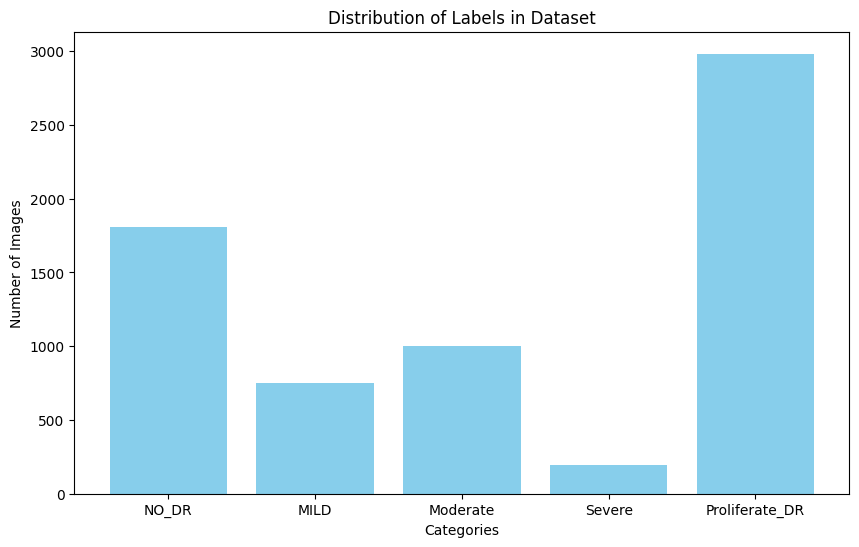

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue')

plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of Labels in Dataset')
plt.xticks(ticks=list(label_names.keys()), labels=[label_names[i] for i in label_counts.index])


plt.show()

In [ ]:
plt.figure(figsize=(12, 7))

for i in range(10):
    sample = random.choice(range(len(image_df)))

    # Access the correct columns
    image_path = image_df.iloc[sample]['Filepath']  # Path to image
    category = image_df.iloc[sample]['Level']        # Label

    # Check if image_path is a string
    if not isinstance(image_path, str):
        print(f"Error: Expected image path to be a string, but got {type(image_path)}")
        continue

    try:
        # Open and show the image
        image = Image.open(image_path)
    except Exception as e:
        print(f"Error opening image {image_path}: {e}")
        continue

    # Define labels
    label_names = {
        0: "No DR",
        1: "Mild",
        2: "Moderate",
        3: "Severe",
        4: "Proliferate DR"
    }

    label = label_names.get(category, "Unknown")

    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(label)  # Use title instead of xlabel for clarity
    plt.axis('off')   # Hide axes for better visualization

plt.tight_layout()
plt.show()

Error opening image /content/drive/MyDrive/dataset/No_DR/1e7ccd4a1c87.png: name 'Image' is not defined
Error opening image /content/drive/MyDrive/dataset/co/bf18ff30a8f6.png: name 'Image' is not defined
Error opening image /content/drive/MyDrive/dataset/Mild/78bcdffb8785.png: name 'Image' is not defined
Error opening image /content/drive/MyDrive/dataset/Moderate/23175b7ef453.png: name 'Image' is not defined
Error opening image /content/drive/MyDrive/dataset/Mild/bacfb1029f6b.png: name 'Image' is not defined
Error opening image /content/drive/MyDrive/dataset/4ecd1fdd1435.png: name 'Image' is not defined
Error opening image /content/drive/MyDrive/dataset/Proliferate_DR/c6a145742708.png: name 'Image' is not defined
Error opening image /content/drive/MyDrive/dataset/Severe/aae8f9f3ef8c.png: name 'Image' is not defined
Error opening image /content/drive/MyDrive/dataset/Severe/4360a112db10.png: name 'Image' is not defined
Error opening image /content/drive/MyDrive/dataset/Moderate/b0d3598170

<Figure size 1200x700 with 0 Axes>

TT SPLIT AND AGUMENTATION

In [ ]:
import cv2
X = []
for i in image_df['Filepath']:

    X.append(image)

X = np.asarray(X)
y = image_df['Level']
Y = np.asarray(y)

In [ ]:
image.shape

(224, 224, 3)

In [ ]:
X

array([[[[114, 139,  64],
         [114, 139,  64],
         [115, 138,  64],
         ...,
         [115, 138,  64],
         [115, 138,  64],
         [114, 139,  64]],

        [[114, 139,  64],
         [116, 137,  64],
         [114, 139,  64],
         ...,
         [114, 139,  64],
         [114, 139,  64],
         [115, 138,  64]],

        [[113, 139,  65],
         [114, 139,  64],
         [114, 139,  64],
         ...,
         [115, 138,  64],
         [114, 138,  64],
         [114, 139,  64]],

        ...,

        [[114, 139,  64],
         [114, 138,  64],
         [114, 139,  64],
         ...,
         [114, 139,  64],
         [114, 139,  64],
         [114, 139,  64]],

        [[114, 139,  64],
         [114, 139,  64],
         [114, 139,  64],
         ...,
         [114, 139,  64],
         [114, 139,  64],
         [114, 139,  64]],

        [[115, 138,  64],
         [114, 139,  64],
         [114, 139,  64],
         ...,
         [114, 139,  64],
        

In [ ]:
Y

array([1, 0, 4, ..., 2, 1, 2])

In [ ]:
!pip install scikit-learn  # Install scikit-learn if you haven't already
import cv2
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split

# ... (Your existing code for loading and processing images) ...

x_train, x_test1, y_train, y_test1 = train_test_split(X, Y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.3, random_state=42)
print(len(x_train), len(x_val), len(x_test))

4709 1413 606


In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(4709, 224, 224, 3)
(1413, 224, 224, 3)
(606, 224, 224, 3)


In [ ]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(4709,)
(1413,)
(606,)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

idg_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

idg_test = ImageDataGenerator(rescale=1./255)

In [ ]:
idg_train.fit(x_train)
idg_train.fit(x_val)
idg_test.fit(x_test)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(
    monitor='loss',
    patience=15,
    verbose = 1,
    restore_best_weights=True,
    mode = 'min'
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg16 = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Activation # Import Flatten

# ... (rest of your code) ...

flat = Flatten()(vgg16.output) # Now Flatten is defined and can be used

# ... (rest of your code) ...

In [ ]:
flat = Flatten()(vgg16.output)

dense1 = Dense(64, kernel_initializer='he_uniform')(flat)
act1 = Activation('relu')(dense1)

dense2 = Dense(128, kernel_initializer='he_uniform')(act1)
act2 = Activation('relu')(dense2)

dense3 = Dense(256, kernel_initializer='he_uniform')(act2)
act3 = Activation('relu')(dense3)

dense4 = Dense(128, kernel_initializer='he_uniform')(act3)
act4 = Activation('relu')(dense4)

dense5 = Dense(64, kernel_initializer='he_uniform')(act4)
act5 = Activation('relu')(dense5)

output = Dense(5, activation='softmax')(act5)

In [ ]:
from tensorflow.keras.models import Model # Import the Model class
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense, Activation

vgg16 = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

for layer in vgg16.layers:
    layer.trainable = False

flat = Flatten()(vgg16.output)

dense1 = Dense(64, kernel_initializer='he_uniform')(flat)
act1 = Activation('relu')(dense1)

dense2 = Dense(128, kernel_initializer='he_uniform')(act1)
act2 = Activation('relu')(dense2)

dense3 = Dense(256, kernel_initializer='he_uniform')(act2)
act3 = Activation('relu')(dense3)

dense4 = Dense(128, kernel_initializer='he_uniform')(act3)
act4 = Activation('relu')(dense4)

dense5 = Dense(64, kernel_initializer='he_uniform')(act4)
act5 = Activation('relu')(dense5)

output = Dense(5, activation='softmax')(act5)

# Now Model is defined and can be used
final_vgg16 = Model(inputs=vgg16.input,outputs=output)

In [ ]:
final_vgg16.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 16,403,205 (62.57 MB)

 Trainable params: 1,688,517 (6.44 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

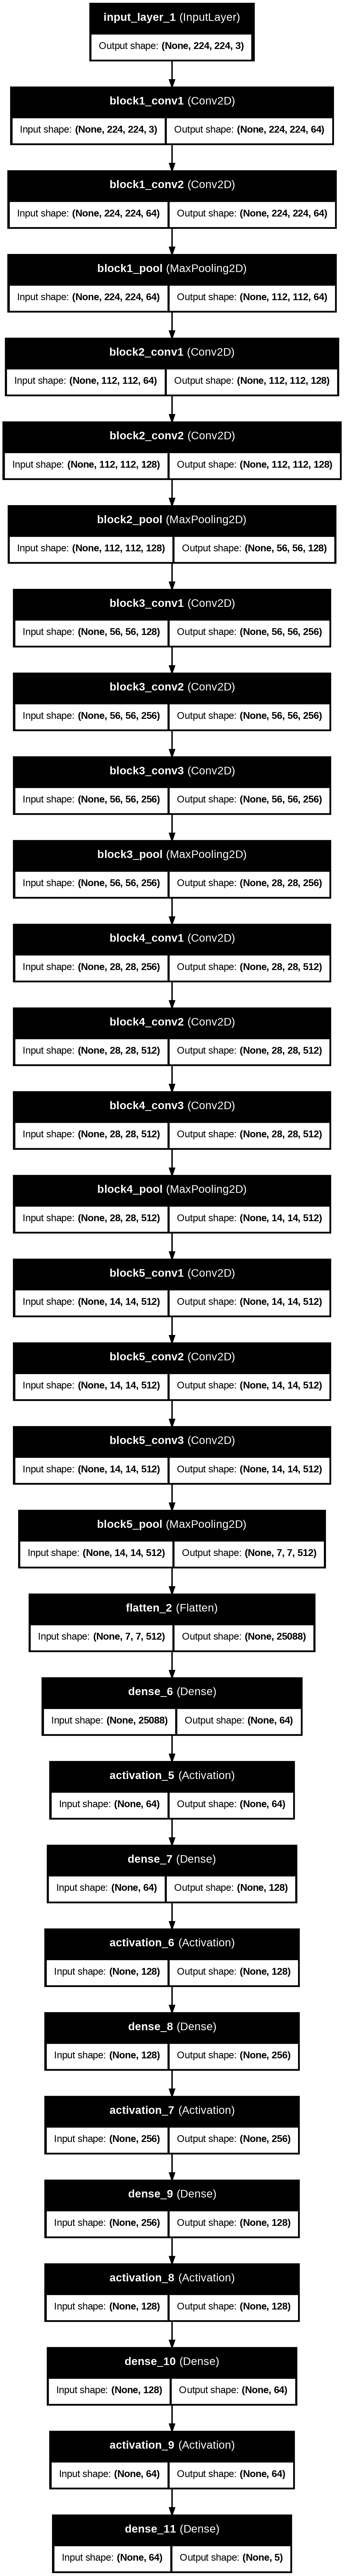

In [ ]:
!pip install tensorflow # Install TensorFlow if not already installed.
import tensorflow as tf # Import TensorFlow with the alias 'tf'

tf.keras.utils.plot_model(final_vgg16, show_shapes = True, show_layer_names=True)

In [ ]:
final_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = final_vgg16.fit(
    x_train,                # Training data
    y_train,                # Training labels
    validation_data=(x_val, y_val),  # Validation data and labels
    batch_size=32,
    epochs=30,
    callbacks=[early_stopping_callback]
)

NameError: name 'x_train' is not defined

VGG19

In [ ]:
import tensorflow as tf # Import TensorFlow if not already installed.

# Import VGG19 from tensorflow.keras.applications
from tensorflow.keras.applications import VGG19

vgg19 = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
import tensorflow as tf # Import TensorFlow if not already installed.
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense, Activation # Import Flatten here

vgg19 = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)

# Now you can use Flatten
x = Flatten()(vgg19.output)
dense1 = Dense(64, kernel_initializer='he_uniform')(x)
act1 = Activation('relu')(dense1)

dense2 = Dense(128, kernel_initializer='he_uniform')(act1)
act2 = Activation('relu')(dense2)

dense3 = Dense(256, kernel_initializer='he_uniform')(act2)
act3 = Activation('relu')(dense3)

dense4 = Dense(128, kernel_initializer='he_uniform')(act3)
act4 = Activation('relu')(dense4)

dense5 = Dense(64, kernel_initializer='he_uniform')(act4)
act5 = Activation('relu')(dense5)

predictions = Dense(5, activation='softmax')(act5)

In [ ]:
from tensorflow.keras.models import Model # Import the Model class

final_vgg19 = Model(inputs=vgg19.input, outputs=predictions)

In [ ]:
final_vgg19.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,712,901 (82.83 MB)

 Trainable params: 21,712,901 (82.83 MB)

 Non-trainable params: 0 (0.00 B)

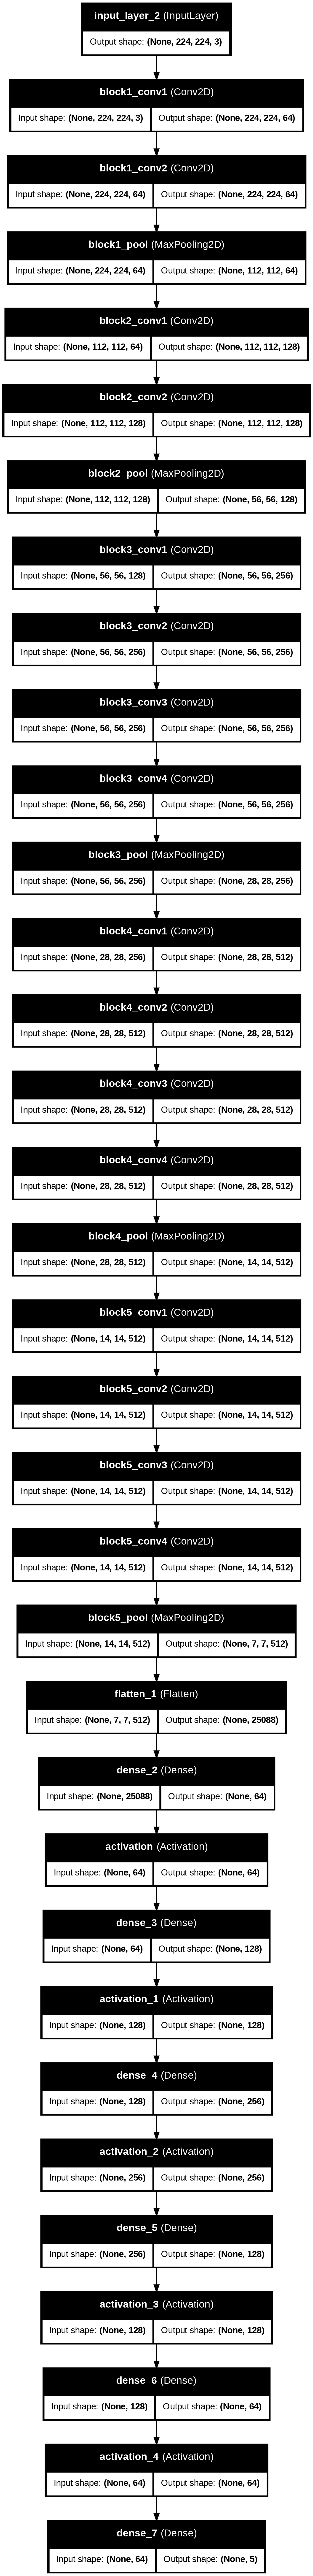

In [ ]:
tf.keras.utils.plot_model(final_vgg19, show_shapes = True, show_layer_names=True)

In [ ]:
final_vgg19.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = final_vgg19.fit(
    X_train,                # Training data
    Y_train,                # Training labels
    validation_data=(x_val, y_val),  # Validation data and labels
    batch_size=32,
    epochs=30,
    callbacks=[early_stopping_callback]
)


NameError: name 'X_train' is not defined

Resnet 50

In [ ]:
!pip install tensorflow
from tensorflow.keras.applications.resnet50 import ResNet50

resnet50 = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
!pip install tensorflow
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Activation # Import necessary layers

resnet50 = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)

x = Flatten()(resnet50.output)

dense1 = Dense(64, kernel_initializer='he_uniform')(x)
bn1 = BatchNormalization()(dense1) # Now BatchNormalization is defined
act1 = Activation('relu')(bn1)      # Now Activation is defined

dense2 = Dense(128, kernel_initializer='he_uniform')(act1)
act2 = Activation('relu')(dense2)    # Now Activation is defined

dense3 = Dense(256, kernel_initializer='he_uniform')(act2)
act3 = Activation('relu')(dense3)    # Now Activation is defined

dense4 = Dense(128, kernel_initializer='he_uniform')(act3)
act4 = Activation('relu')(dense4)    # Now Activation is defined

dense5 = Dense(64, kernel_initializer='he_uniform')(act4)
act5 = Activation('relu')(dense5)    # Now Activation is defined

predictions = Dense(5, activation='softmax')(act5) # Now Dense is defined

In [ ]:
final_resnet50 = Model(inputs=resnet50.input, outputs=predictions)

In [ ]:
final_resnet50.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 30,093,381 (114.80 MB)

 Trainable params: 30,040,133 (114.59 MB)

 Non-trainable params: 53,248 (208.00 KB)

In [ ]:
tf.keras.utils.plot_model(final_resnet50, show_shapes = True, show_layer_names=True)

InvocationException: Program terminated with status: -6. stderr follows: failed at node 14054[1]
dot: maze.c:313: chkSgraph: Assertion `np->cells[1]' failed.


In [ ]:
final_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = final_resnet50.fit(
    x_train,                # Training data
    y_train,                # Training labels
    validation_data=(x_val, y_val),  # Validation data and labels
    batch_size=32,
    epochs=30,
    callbacks=[early_stopping_callback]
)

NameError: name 'x_train' is not defined